# Experimental Tests

In [1]:
import torch
torch.set_grad_enabled(False)
import math

from dataset import generate_dataset_disk
from module import *
from training import train, test

from plotter import *
from mlxtend.plotting import plot_decision_regions

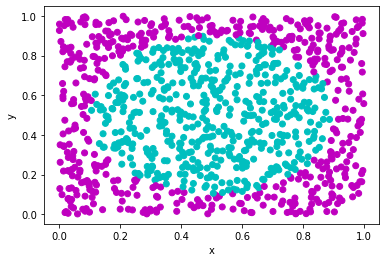

In [2]:
# Load the dataset
train_input, train_label = generate_dataset_disk()
test_input, test_label = generate_dataset_disk(plot=False)

Epoch 10/300, Train_Loss: 0.5705, Val_Loss: 0.6423
Epoch 20/300, Train_Loss: 0.5192, Val_Loss: 0.5920
Epoch 30/300, Train_Loss: 0.4653, Val_Loss: 0.5313
Epoch 40/300, Train_Loss: 0.4167, Val_Loss: 0.4702
Epoch 50/300, Train_Loss: 0.3855, Val_Loss: 0.4320
Epoch 60/300, Train_Loss: 0.3661, Val_Loss: 0.4078
Epoch 70/300, Train_Loss: 0.3533, Val_Loss: 0.3928
Epoch 80/300, Train_Loss: 0.3441, Val_Loss: 0.3830
Epoch 90/300, Train_Loss: 0.3374, Val_Loss: 0.3764
Epoch 100/300, Train_Loss: 0.3322, Val_Loss: 0.3717
Epoch 110/300, Train_Loss: 0.3281, Val_Loss: 0.3678
Epoch 120/300, Train_Loss: 0.3248, Val_Loss: 0.3646
Epoch 130/300, Train_Loss: 0.3221, Val_Loss: 0.3622
Epoch 140/300, Train_Loss: 0.3198, Val_Loss: 0.3602
Epoch 150/300, Train_Loss: 0.3179, Val_Loss: 0.3583
Epoch 160/300, Train_Loss: 0.3162, Val_Loss: 0.3569
Epoch 170/300, Train_Loss: 0.3148, Val_Loss: 0.3557
Epoch 180/300, Train_Loss: 0.3134, Val_Loss: 0.3546
Epoch 190/300, Train_Loss: 0.3122, Val_Loss: 0.3537
Epoch 200/300, Train_

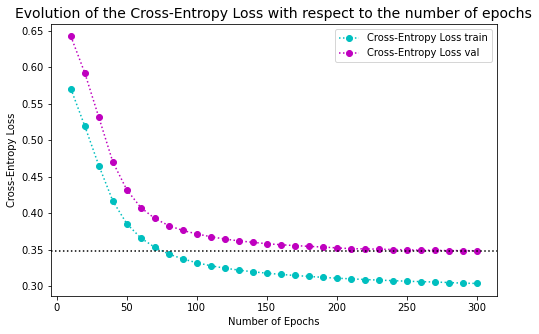

In [3]:
# model
model = Sequential(Linear(2, 25), ReLU(),
                   Linear(25,25), ReLU(),
                   Linear(25,25), ReLU(),
                   Linear(25,2), Sigmoid())

# loss function
loss_function = Loss(model, fun='CrossEntropy')

# training parameters
batch_size = 25
nb_epochs = 300
lr = 1e-3

# train 
train(model, loss_function, train_input, train_label, nb_epochs, lr, batch_size=batch_size, show_plot=True, verbose=True)

In [4]:
# test
train_error = test(model, train_input, train_label)
test_error = test(model, test_input, test_label)

print('Train Error: {}%'.format(train_error))
print('Test Error: {}%'.format(test_error))

Train Error: 1.7000000000000002%
Test Error: 1.7000000000000002%


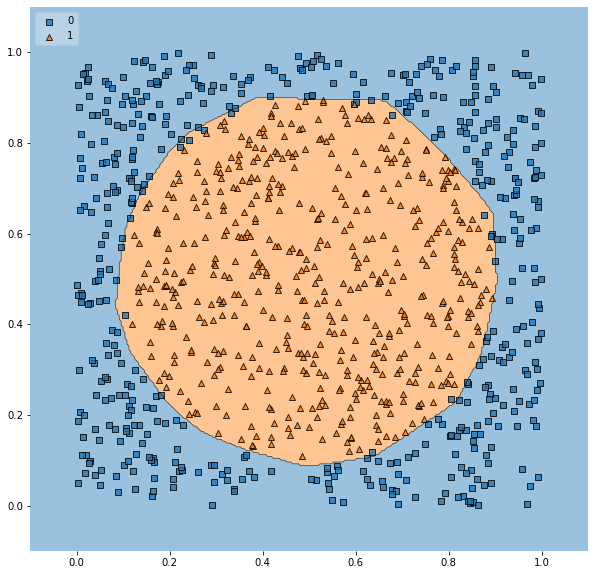

In [5]:
class ModelNoHoneHot():
    def __init__(self, model):
        self.model = model

    def predict(self, x):
        x = torch.tensor(x)
        preds = self.model(x)
        return torch.argmax(preds, dim=1).numpy()
model_no_one_hot = ModelNoHoneHot(model)

# decision regions
plt.figure(figsize=(10, 10))
plot_decision_regions(test_input.numpy(), torch.argmax(test_label, dim=1).numpy(), clf=model_no_one_hot, legend=2)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.savefig('plots/decision regions')
plt.show()